<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_9_ASSIGNMENT_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (1 ponto) Design a multilayer ANN architecture to identify the hand-written digits using the
Keras deep learning library. Consider the MNIST data set

2. (1 ponto) Calculate the accuracy with training and testing data

3. (1 ponto) Also, change the architecture by tuning no. of hidden layers, no. of hidden neurons
and activation functions in hidden layer. Identify best architecture in terms of testing accuracy
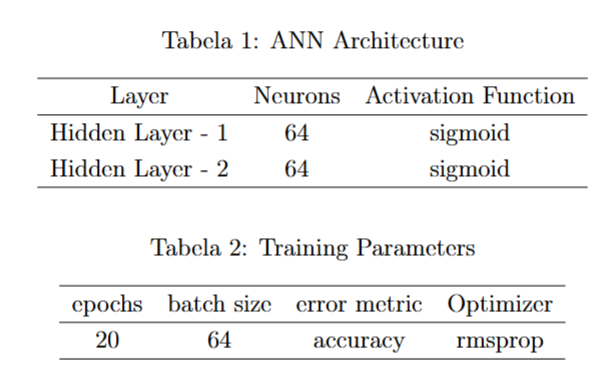

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def mnist_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='sigmoid'),
        Dense(64, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])
    return model

model = mnist_model()
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

model.save("mnist_model.h5")

loaded_model = tf.keras.models.load_model("mnist_model.h5")
new_data = tf.random.uniform((1, 28, 28))
predicted_result = loaded_model.predict(new_data)
print("Predicted Digit:", tf.argmax(predicted_result, axis=1).numpy()[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7172 - loss: 1.1844 - val_accuracy: 0.9215 - val_loss: 0.2843
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9223 - loss: 0.2704 - val_accuracy: 0.9404 - val_loss: 0.2043
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9434 - loss: 0.1934 - val_accuracy: 0.9502 - val_loss: 0.1656
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9520 - loss: 0.1607 - val_accuracy: 0.9561 - val_loss: 0.1411
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9622 - loss: 0.1277 - val_accuracy: 0.9598 - val_loss: 0.1285
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9674 - loss: 0.1112 - val_accuracy: 0.9624 - val_loss: 0.1199
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9693 - loss: 0.1011 - val_accuracy: 0.9659 - val_loss: 0.1054
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9740 - loss: 0.0884 - val_accuracy: 0

Train Accuracy: 0.9919499754905701
Test Accuracy: 0.974399983882904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Digit: 5
